# Number of Schools in each Neighborhood in Pittsburgh
 


### By: Gavin Zheng

##### Dataset: [Public Schools in Pittsburgh as of April 2019](https://data.wprdc.org/dataset/pittsburgh-public-school-locations/resource/06664b02-c673-49d5-8a70-d3cd1c18ac8d?view_id=fb97e20d-162e-4610-8dca-a18cf5459fa7)

Let's start by loading in the data and necessary libraries. 

**!!!!!!! important!!!!!!!**
To load the libraries, require to download **contextily** package.
- https://pypi.org/project/contextily/

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import contextily as cx
%matplotlib inline
import numpy as np
plt.rcParams["figure.dpi"] = 70 # lower image size

In [ ]:
df= pd.read_csv("pps_schoolsapr2019publish.csv")
df.head()

,sourcedid,name,address,city,state,zip,latitude,longitude
0,9861,Allderdice Early Headstart,2409 Shady Avenue,Pittsburgh,PA,15217,40.429415,-79.919132
1,301,Allderdice High School,2409 SHADY AVE,PITTSBURGH,PA,15217,40.429416,-79.919370
2,204,Allegheny 6-8,810 ARCH ST,PITTSBURGH,PA,15212,40.453231,-80.008655
3,9863,Allegheny Early Childhood,810 ARCH STREET,Pittsburgh,PA,15212,40.453266,-80.008600
4,102,Allegheny K-5,810 ARCH ST,PITTSBURGH,PA,15212,40.453181,-80.008895


In [ ]:
cnt = 0
visited = []
for i in range(0, len(df['zip'])):
    if df['zip'][i] not in visited:  
        visited.append(df['zip'][i])   
        cnt += 1  
print("No.of.unique values :",
      cnt)  
print("unique values :",
      visited)

No.of.unique values : 22
unique values : [15217, 15212, 15210, 15201, 15216, 15226, 15222, 15204, 15213, 15220, 15214, 15233, 15221, 15206, 15208, 15205, 15207, 15232, 15219, 15203, 15211, 15224]


In [ ]:
mostSchools = df['zip'].value_counts()
mostSchools

15212    15
15206    10
15210     9
15226     7
15217     6
15219     6
15216     6
15208     6
15233     5
15201     5
15213     4
15207     4
15204     3
15205     3
15220     2
15214     2
15222     2
15203     2
15224     2
15221     1
15232     1
15211     1
Name: zip, dtype: int64

Text(0.5, 1.0, 'Distribution of Schools in Each Area Code')

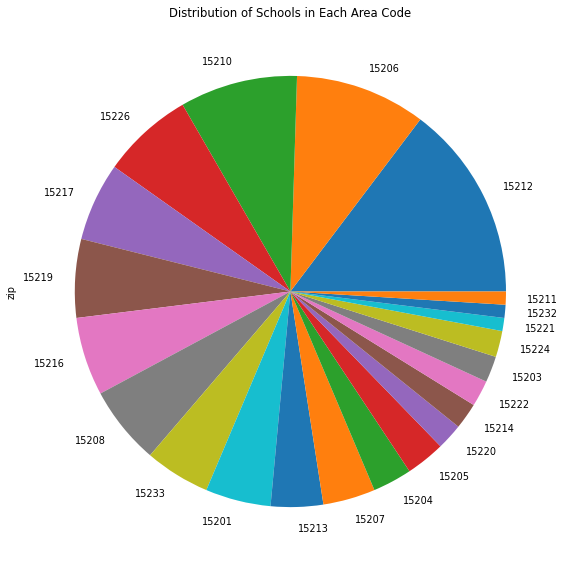

In [ ]:
ax= mostSchools.plot(kind='pie', figsize= (10, 10))
ax.set_title("Distribution of Schools in Each Area Code")

In [ ]:
df_geo= gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.longitude,df.latitude))
df_geo.crs= 4326
df_geo.head()

,sourcedid,name,address,city,state,zip,latitude,longitude,geometry
0,9861,Allderdice Early Headstart,2409 Shady Avenue,Pittsburgh,PA,15217,40.429415,-79.919132,POINT (-79.91913 40.42942)
1,301,Allderdice High School,2409 SHADY AVE,PITTSBURGH,PA,15217,40.429416,-79.919370,POINT (-79.91937 40.42942)
2,204,Allegheny 6-8,810 ARCH ST,PITTSBURGH,PA,15212,40.453231,-80.008655,POINT (-80.00866 40.45323)
3,9863,Allegheny Early Childhood,810 ARCH STREET,Pittsburgh,PA,15212,40.453266,-80.008600,POINT (-80.00860 40.45327)
4,102,Allegheny K-5,810 ARCH ST,PITTSBURGH,PA,15212,40.453181,-80.008895,POINT (-80.00889 40.45318)


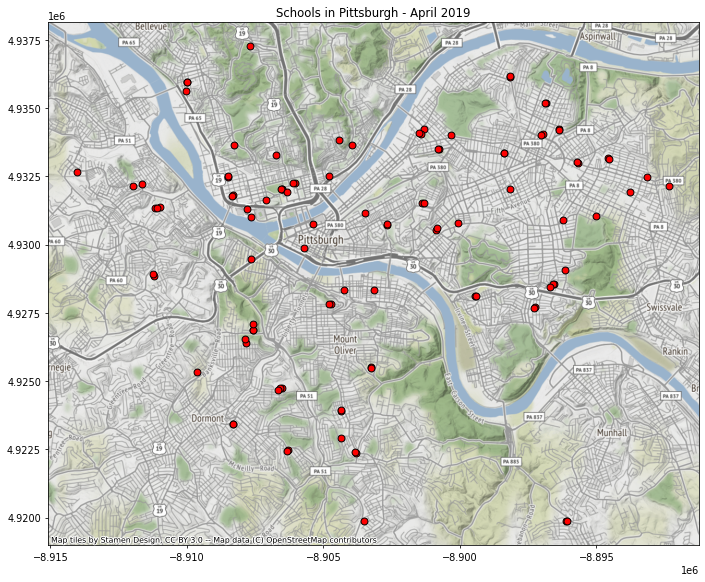

In [ ]:
ax = df_geo.to_crs('EPSG:3857').plot(color="red",edgecolor="black",markersize=50,figsize=(12, 12))
ax.set_title('Schools in Pittsburgh - April 2019')
cx.add_basemap(ax)

![](allegheny-county-pennsylvania-zip-codes-map-1.png)

### Metric: Number of Schools/Processes/Conclusion

In the beginning, I did some data exploration and analysis to have a better understanding of the data I was working with. Below is some code written that shows how many unique zip codes were in my dataset. I also used data visualization to more easily see which zip code had the highest number of schools. 

After seeing that 15212 had the most amount of schools, I wanted to see on a map how congregated all the the schools were. In doing so, I had to convert to geopandas to map out my data visually. 

In our research, we decided on this metric to help us determine the most educated neighborhood in Pittsburgh because more schools within a neighborhood means that there are more people in need of education as well as a more varied choice of schools that parents can choose from. In conclusin of my analysis, the zipcode 15212, which is Brighton Heights had the most number of schools.